In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk #natural language toolkit
nltk.download('punkt')
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Himanshi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
df=pd.read_csv("spam.csv",sep=",",encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3095,ham,We walked from my moms. Right on stagwood pass...,NaN,NaN,NaN
4407,ham,Take care and sleep well.you need to learn to ...,NaN,NaN,NaN
3617,ham,Hey check it da. I have listed da.,NaN,NaN,NaN
3217,ham,Don know:)this week i'm going to tirunelvai da.,NaN,NaN,NaN
1315,ham,"Whenevr ur sad, Whenevr ur gray, Remembr im he...",NaN,NaN,NaN


In [10]:
df.shape

(5572, 5)

In [7]:
#data cleaning
#EDA
#text preprocessing
#model building


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
#drop last 3 columns

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True) 
# delete rows or columns directly from the original dataframe


In [20]:
df.sample(4)

,target,text
3953,ham,I probably won't eat at all today. I think I'm...
3111,ham,Just haven't decided where yet eh ?
2516,ham,Yes.i'm in office da:)
5258,ham,1 in cbe. 2 in chennai.


In [21]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(10)

,target,text
3983,ham,"Hey, I missed you tm of last night as my phone..."
682,ham,Is xy going 4 e lunch?
1784,ham,"Dont search love, let love find U. Thats why i..."
2573,spam,Congrats 2 mobile 3G Videophones R yours. call...
1240,ham,Oh yes I can speak txt 2 u no! Hmm. Did u get ...
2004,ham,"Goodmorning, today i am late for &lt;DECIMAL&..."
3426,ham,Haha okay... Today weekend leh...
2917,ham,Thanks chikku..:-) gud nyt:-*
3117,ham,R u saying i should re order the slippers cos ...
5184,ham,I'm in town now so i'll jus take mrt down later.


In [22]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [23]:
encoder.fit_transform(df['target'])  #code ham or spam 0 or 1

array([0, 0, 1, ..., 0, 0, 0])

In [24]:
df['target']=encoder.fit_transform(df['target'])

In [15]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.isnull().sum()  #missing values

target    0
text      0
dtype: int64

In [17]:
#check duplicates

df.duplicated().sum()

403

In [18]:
df= df.drop_duplicates()

In [19]:

df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

In [21]:
#EDA
#data division - %of ham and spam 0/1

df['target'].value_counts()
 

0    4516
1     653
Name: target, dtype: int64

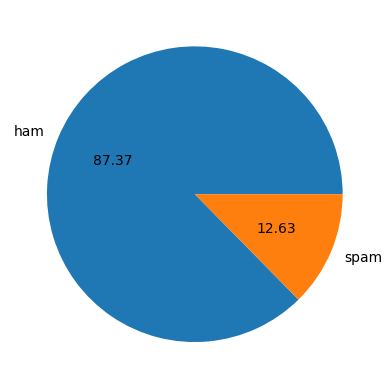

In [22]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [23]:
#data is imbalanced



In [24]:
df['num_of_characters']=df['text'].apply(len)


C:\Users\Himanshi\AppData\Local\Temp\ipykernel_12376\748017277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_characters']=df['text'].apply(len)


In [25]:
df.head()

,target,text,num_of_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
#fetch no of words

df['text'].apply(lambda x:nltk.word_tokenize(x))   #breaking sms on the basis of words



0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: text, Length: 5169, dtype: object

In [27]:
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [28]:
df['num_of_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\Himanshi\AppData\Local\Temp\ipykernel_12376\4259316858.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [29]:
df.head()

,target,text,num_of_characters,num_of_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['text'].apply(lambda x:(nltk.sent_tokenize(x)))  #tokenizing on basis of sentence

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: text, Length: 5169, dtype: object

In [31]:
df['num_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\Himanshi\AppData\Local\Temp\ipykernel_12376\1992406892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_of_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [32]:
df.head()


,target,text,num_of_characters,num_of_words,num_of_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_of_characters','num_of_words','num_of_sentences']].describe()


,num_of_characters,num_of_words,num_of_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
df.describe().T.style.background_gradient(cmap="Purples_r")

,count,mean,std,min,25%,50%,75%,max
target,5169.000000,0.126330,0.332253,0.000000,0.000000,0.000000,0.000000,1.000000
num_of_characters,5169.000000,78.977945,58.236293,2.000000,36.000000,60.000000,117.000000,910.000000
num_of_words,5169.000000,18.455794,13.324758,1.000000,9.000000,15.000000,26.000000,220.000000
num_of_sentences,5169.000000,1.965564,1.448541,1.000000,1.000000,1.000000,2.000000,38.000000


In [35]:
df[df['target'] == 0][['num_of_characters','num_of_words','num_of_sentences']].describe() #ham

,num_of_characters,num_of_words,num_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
df[df['target'] == 1][['num_of_characters','num_of_words','num_of_sentences']].describe() #spam

,num_of_characters,num_of_words,num_of_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Figure size 1000x600 with 0 Axes>

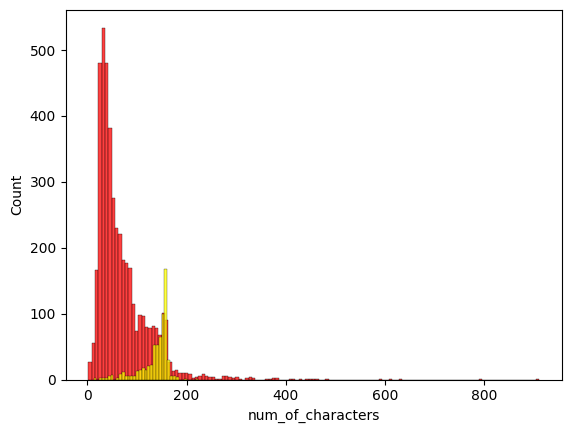

<Figure size 1000x600 with 0 Axes>

In [37]:
sns.histplot(df[df['target']==0]['num_of_characters'],color='red')
sns.histplot(df[df['target']==1]['num_of_characters'],color='yellow')
plt.figure(figsize=(10,6))

<Figure size 1000x600 with 0 Axes>

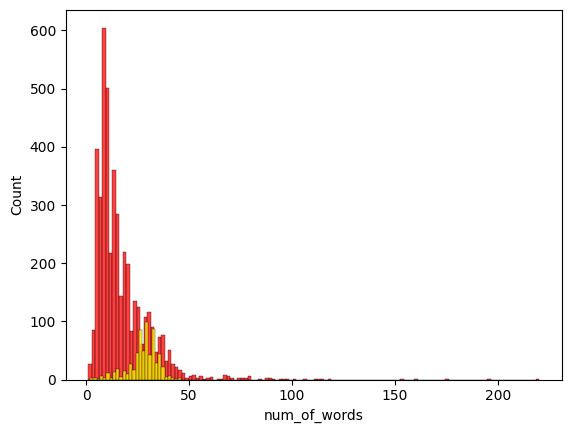

<Figure size 1000x600 with 0 Axes>

In [38]:
sns.histplot(df[df['target']==0]['num_of_words'],color='red')
sns.histplot(df[df['target']==1]['num_of_words'],color='yellow')
plt.figure(figsize=(10,6))   

#outliers do exist

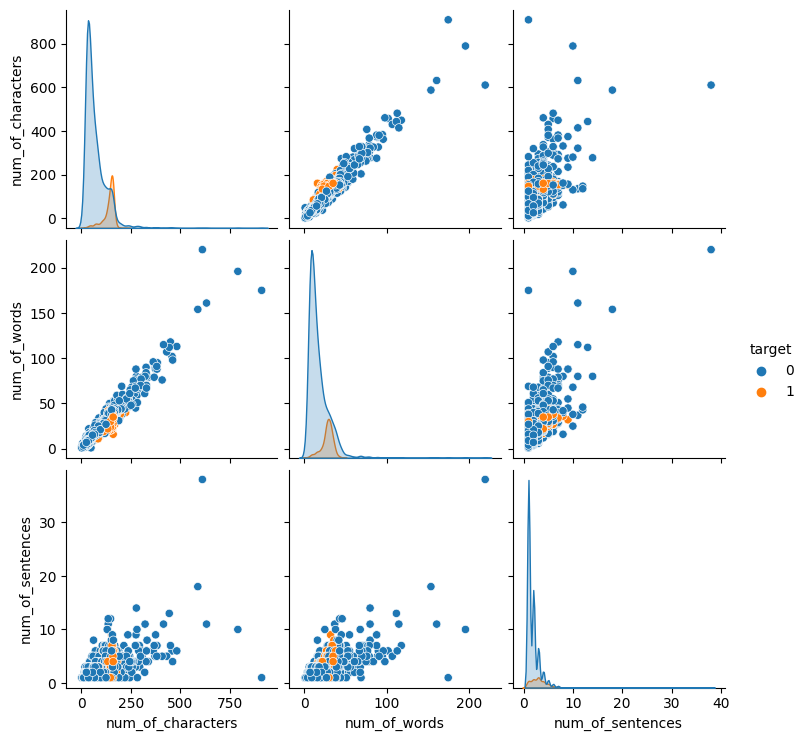

In [39]:
sns.pairplot(df,hue='target')   #outliers exist and may cause problem

In [40]:
df.corr()   #using target vs num_of_characters

,target,num_of_characters,num_of_words,num_of_sentences
target,1.000000,0.384717,0.262912,0.263939
num_of_characters,0.384717,1.000000,0.965760,0.624139
num_of_words,0.262912,0.965760,1.000000,0.679971
num_of_sentences,0.263939,0.624139,0.679971,1.000000


<AxesSubplot:>

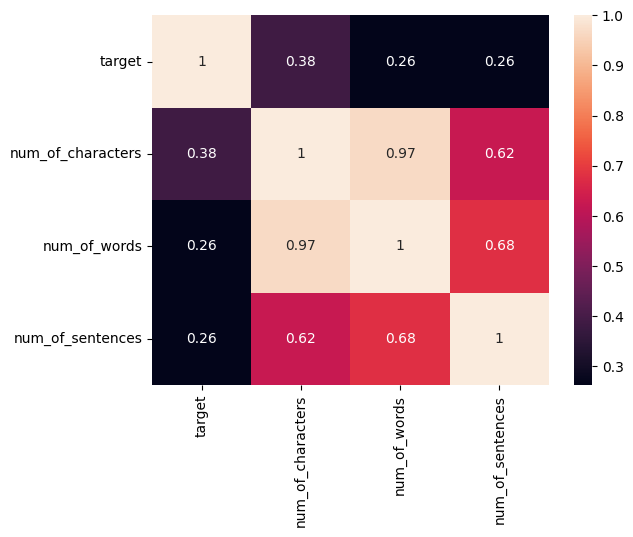

In [41]:
sns.heatmap(df.corr(),annot=True)

In [42]:
#Text Preprocessing

#-lower case
#-tokenization
#-removw special characters
#-removing stopwords and punctuation
#-stemming (group similar type of word- play,plays,played)

from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [43]:
def data_preprocessing (txt):
    txt=txt.lower()
    txt=nltk.word_tokenize(txt)
   
    y=[]
    
    for i in txt:
        if i.isalnum():
            y.append(i)
    
    txt=y[:] #cloning
    y.clear()
    for i in txt:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    txt=y[:]
    y.clear()
    
    for i in txt:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [44]:
df["transformed_text"]=df["text"].apply(data_preprocessing)
df.head()

C:\Users\Himanshi\AppData\Local\Temp\ipykernel_12376\4138035458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transformed_text"]=df["text"].apply(data_preprocessing)


,target,text,num_of_characters,num_of_words,num_of_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


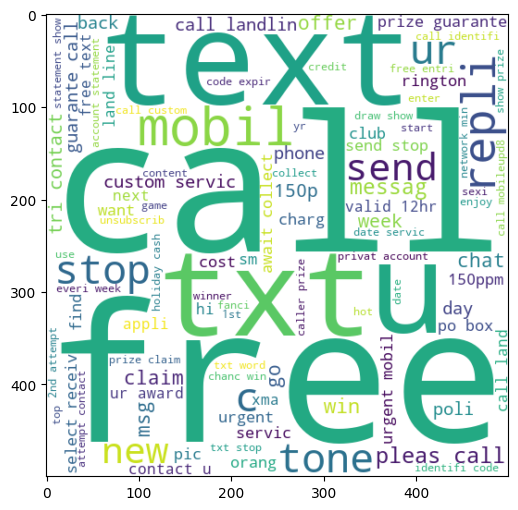

In [54]:
from PIL import Image,ImageDraw,ImageFont
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')      
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))   #wordcloud for spam messages
plt.figure(figsize=(15,6))
plt.imshow(spam_wc,interpolation="bilinear")

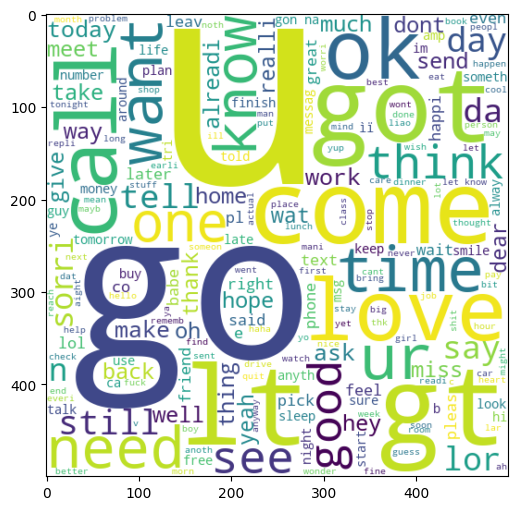

In [84]:
wc_ham = WordCloud(width=400,height=400,min_font_size=10,background_color='white')      
ham = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))   #wordcloud for spam messages
plt.figure(figsize=(15,6))
plt.imshow(ham,interpolation="bilinear")

In [47]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
              spam_corpus.append(word)
              
len(spam_corpus)

9939

In [48]:
from collections import Counter
Counter (spam_corpus).most_common(30)
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

In [49]:
ham_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
              ham_corpus.append(word)
              
len(ham_corpus)

9939

In [50]:
pd.DataFrame(Counter(ham_corpus).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

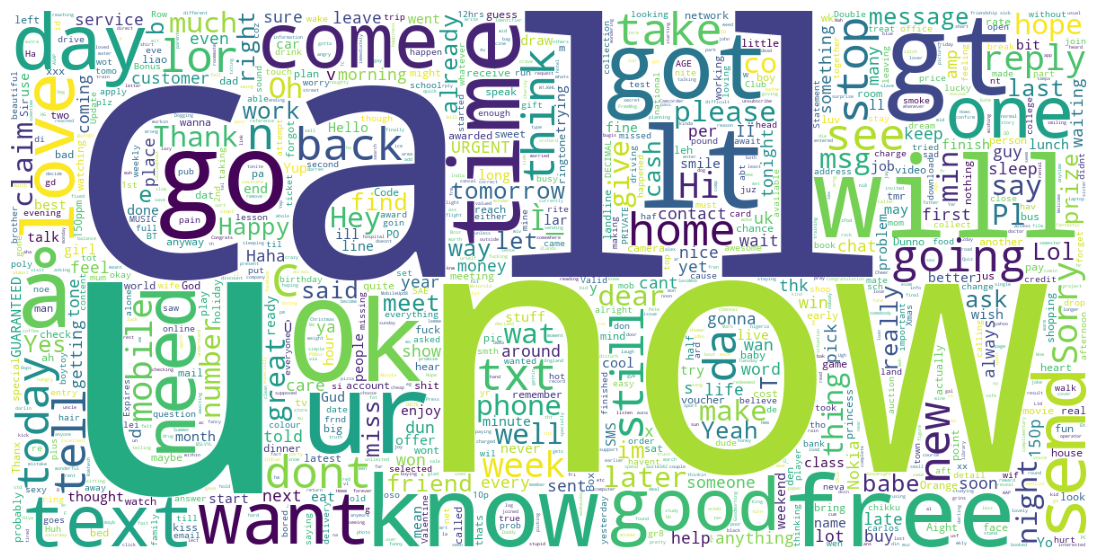

In [51]:
text = " ".join(i for i in df.text)

wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "#410F01", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

wc.generate(text)

plt.figure(figsize = [12, 7])
plt.imshow(wc)
plt.axis("off")
plt.show

In [58]:
#MODEL BUILDING
 #starting with naive based because text based

#naive based needs numeric info
#here input (transformed text is not in number) we convert it into vectors

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()


In [59]:
#X=cv.fit_transform(df['transformed_text']).toarray() 
X= tfidf.fit_transform(df['transformed_text']).toarray()
X.shape



(5169, 6708)

In [60]:
Y=df['target'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [64]:
gnb.fit(X_train,Y_train)
Y_pred1 = gnb.predict(X_test)
print("Gaussian Naive Bayes\n")
print("Accuracy Score=",accuracy_score(Y_test,Y_pred1),"\n")
print("Precision Score=",precision_score(Y_test,Y_pred1),"\n")
print("Confusion Matrix=\n",confusion_matrix(Y_test,Y_pred1))


Gaussian Naive Bayes

Accuracy Score= 0.8762088974854932 

Precision Score= 0.5231481481481481 

Confusion Matrix=
 [[793 103]
 [ 25 113]]


In [65]:
mnb.fit(X_train,Y_train)
Y_pred2 = mnb.predict(X_test)
print("Multinomial Naive Bayes\n")
print("Accuracy Score=",accuracy_score(Y_test,Y_pred2),"\n")
print("Precision Score=",precision_score(Y_test,Y_pred2),"\n")
print("Confusion Matrix=\n",confusion_matrix(Y_test,Y_pred2))

Multinomial Naive Bayes

Accuracy Score= 0.9593810444874274 

Precision Score= 1.0 

Confusion Matrix=
 [[896   0]
 [ 42  96]]


In [66]:
bnb.fit(X_train,Y_train)
Y_pred3 = mnb.predict(X_test)
print("Binomial Naive Bayes\n")
print("Accuracy Score=",accuracy_score(Y_test,Y_pred3),"\n")
print("Precision Score=",precision_score(Y_test,Y_pred3),"\n")
print("Confusion Matrix=\n",confusion_matrix(Y_test,Y_pred3))

Multinomial Naive Bayes

Accuracy Score= 0.9593810444874274 

Precision Score= 1.0 

Confusion Matrix=
 [[896   0]
 [ 42  96]]


In [77]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

mnb=MultinomialNB()
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
clf = svm.SVC()

In [80]:
refs={
    'KNC':knc,
    'NB': mnb,
    'SVM' :clf,
    'RFC':rfc
    
}


In [81]:
def train_classifier(ref,X_train,Y_train,X_test,Y_test):
    ref.fit(X_train,Y_train)
    Y_pred = ref.predict(X_test)
    accuracy = accuracy_score(Y_test,Y_pred)
    precision = precision_score(Y_test,Y_pred)
    
    return accuracy,precision

In [82]:
accuracy_scores = []
precision_scores = []

for name,ref in refs.items():
    
    current_accuracy,current_precision = train_classifier(ref, X_train,Y_train,X_test,Y_test)
    
    print("For ",name)
    print("\nAccuracy - ",current_accuracy)
    print("Precision - ",current_precision,"\n")
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KNC

Accuracy -  0.9003868471953579
Precision -  1.0 

For  NB

Accuracy -  0.9593810444874274
Precision -  1.0 

For  SVM

Accuracy -  0.9661508704061895
Precision -  0.9813084112149533 

For  RFC

Accuracy -  0.971953578336557
Precision -  1.0 



In [85]:
performance_df = pd.DataFrame({'Algorithm':refs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [86]:
performance_df

,Algorithm,Accuracy,Precision
0,KNC,0.900387,1.000000
1,NB,0.959381,1.000000
3,RFC,0.971954,1.000000
2,SVM,0.966151,0.981308


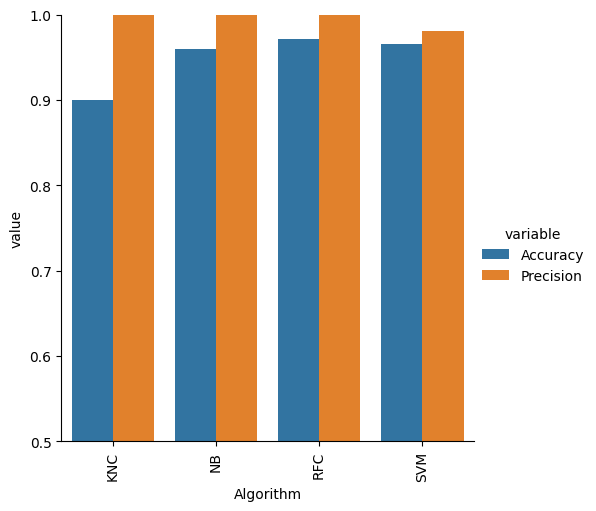

In [87]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [88]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
Y_pred4 = rfc.predict(X_test)
print("Accuracy and Precision for Random Forest Classifier")
train_classifier(rfc,X_train,Y_train,X_test,Y_test)


Accuracy and Precision for Random Forest Classifier


(0.97678916827853, 1.0)

In [89]:
cm= confusion_matrix(Y_test, Y_pred4)  
print(cm)

[[894   2]
 [ 23 115]]


In [90]:
import pickle
pickle.dump(tfidf,open('vector.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))